# ANALYSIS OF RESULTS

In this jupyter notebook we analyze the results of experiments carried out so far. The results are stored in json files.

**Import modules and packages**

In [1]:
import ast
import os
import numpy as np
import pandas as pd
import json
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

**Function to extract model path**

In [2]:
def get_model_path(model_prefix, index, hyperparameter_dir):
    return [hyperparameter_dir+model for model in os.listdir(hyperparameter_dir) \
            if ((str(index) in model) and (model.startswith(model_prefix)))][0]

## 1. Display Results

### 1.1 Salt Identification Challenge Dataset

#### 1.1.1 Unet

In [3]:
# indexes of models
indexes = [0,1,2,3,4,5]

model_prefix = "unet-salt_identification_challenge"
hyperparameter_dir = "./hyperparameters/"
results_dir = "./results/"

ids = []
list_of_kernels = []
list_of_conv_filters = []
list_of_transpose_conv_filters = []
list_of_learning_rates = []
list_of_max_iters = []
list_of_strides = []
list_of_batch_size = []
list_of_best_cost = []
list_of_best_time = []
list_of_best_iters = []
list_of_iou = []

# iterate through model
for index in indexes:
    # extract the filename of json containing hyperparameters
    filename = get_model_path(model_prefix, index, hyperparameter_dir)
    # extract the hyperparameters from json file
    with open(filename, 'r') as fp:
        data = json.load(fp)
        ids.append(data['id'])
        list_of_kernels.append(data['kernels'])
        list_of_conv_filters.append(data['conv_filters'])
        list_of_transpose_conv_filters.append(data['transpose_conv_filters'])
        list_of_learning_rates.append(data['learning_rate'])
        list_of_max_iters.append(data['max_iters'])
        list_of_strides.append(data['strides'])
        list_of_batch_size.append(data['batch_size'])
        
    # extract the filename of json containing results
    filename = get_model_path(model_prefix, index, results_dir)
    # extract the results from json file
    with open(filename, 'r') as fp:
        data = json.load(fp)
        list_of_best_cost.append(round(float(data['best_cost']),3))
        list_of_best_time.append(round(float(data['best_time']),3))
        list_of_iou.append(round(float(data['iou']),3))
        list_of_best_iters.append(data['best_iteration'])

# create dataframe to show the hyperparameters and results
pd.DataFrame({"id": ids,
             "kernels": list_of_kernels,
             "conv_filters": list_of_conv_filters,
             "transpose_conv_filters":list_of_transpose_conv_filters,
             "learning_rate": list_of_learning_rates,
             "max_iters": list_of_max_iters,
             "batch_size": list_of_batch_size,
              "best_cost": list_of_best_cost, 
              "computation_time/mins": list_of_best_time,
              "best_iter": list_of_best_iters,
              "iou": list_of_iou}).sort_values("id")

id       kernels        conv_filters transpose_conv_filters  learning_rate  \
0   0  [7, 7, 5, 3]  [32, 64, 128, 128]     [128, 128, 64, 32]        0.00004   
1   1  [7, 7, 5, 3]  [32, 64, 128, 128]      [128, 64, 32, 32]        0.00006   
2   2  [7, 7, 5, 3]   [16, 32, 64, 128]      [128, 64, 32, 32]        0.00006   
3   3     [7, 5, 5]       [32, 64, 128]          [128, 64, 32]        0.00006   
4   4     [7, 5, 5]       [32, 64, 128]           [64, 32, 16]        0.00006   
5   5     [7, 5, 5]        [32, 64, 64]           [64, 32, 16]        0.00006   

   max_iters  batch_size  best_cost  computation_time/mins  best_iter    iou  
0      10000         200      0.616                202.942       9586  0.725  
1      12000         200      0.613                125.159       6909  0.727  
2      12000         200      0.615                147.409       9243  0.743  
3      12000         200      0.616                216.952      11278  0.716  
4      12000         200      0.619                162.635      11312  0.699  
5      12000         200      0.618                160.279      11574  0.703

#### 1.1.2 Improved Unet

In [4]:
# indexes of models
indexes = [0,1,2,3,4,5]

model_prefix = "improved-unet-salt_identification_challenge"
hyperparameter_dir = "./hyperparameters/"
results_dir = "./results/"

ids = []
list_of_kernels = []
list_of_conv_filters = []
list_of_transpose_conv_filters = []
list_of_learning_rates = []
list_of_max_iters = []
list_of_strides = []
list_of_max_pool_kernel_size = []
list_of_max_pool_strides = []
list_of_batch_size = []
list_of_best_cost = []
list_of_best_time = []
list_of_best_iters = []
list_of_iou = []

# iterate through each model
for index in indexes:
    # extract the filename of json containing hyperparameters
    filename = get_model_path(model_prefix, index, hyperparameter_dir)
    # extract the hyperparameters from json file
    with open(filename, 'r') as fp:
        data = json.load(fp)
        ids.append(data['id'])
        list_of_kernels.append(data['kernels'])
        list_of_conv_filters.append(data['conv_filters'])
        list_of_transpose_conv_filters.append(data['transpose_conv_filters'])
        list_of_learning_rates.append(data['learning_rate'])
        list_of_max_iters.append(data['max_iters'])
        list_of_strides.append(data['strides'])
        list_of_batch_size.append(data['batch_size'])
        
    # extract the filename of json containing results
    filename = get_model_path(model_prefix, index, results_dir)
    # extract the results from json file
    with open(filename, 'r') as fp:
        data = json.load(fp)
        list_of_best_cost.append(round(float(data['best_cost']),3))
        list_of_best_time.append(round(float(data['best_time']),3))
        list_of_iou.append(round(float(data['iou']),3))
        list_of_best_iters.append(data['best_iteration'])

# create dataframe to show the hyperparameters and results
pd.DataFrame({"id": ids,
             "kernels": list_of_kernels,
             "conv_filters": list_of_conv_filters,
             "transpose_conv_filters":list_of_transpose_conv_filters,
             "learning_rate": list_of_learning_rates,
             "max_iters": list_of_max_iters,
             "batch_size": list_of_batch_size,
              "best_cost": list_of_best_cost, 
              "computation_time/mins": list_of_best_time,
              "#train_steps": list_of_best_iters,
              "iou": list_of_iou}).sort_values("id")

id       kernels        conv_filters transpose_conv_filters  learning_rate  \
0   0  [7, 7, 5, 3]  [32, 64, 128, 128]     [128, 128, 64, 32]        0.00005   
1   1  [7, 7, 5, 3]  [32, 64, 128, 128]      [128, 64, 32, 32]        0.00006   
2   2  [7, 7, 5, 3]   [16, 32, 64, 128]      [128, 64, 32, 32]        0.00006   
3   3     [7, 5, 5]       [32, 64, 128]          [128, 64, 32]        0.00006   
4   4     [7, 5, 5]       [32, 64, 128]           [64, 32, 16]        0.00006   
5   5     [7, 5, 5]        [32, 64, 64]           [64, 32, 16]        0.00006   

   max_iters  batch_size  best_cost  computation_time/mins  #train_steps  \
0       4000         200      0.614                153.694          3749   
1       4000         200      0.614                125.590          3564   
2       4000         200      0.614                118.216          4000   
3       4000         200      0.617                121.610          3790   
4       4000         200      0.618                 90.409          3759   
5       4000         200      0.619                 83.014          3617   

     iou  
0  0.749  
1  0.777  
2  0.744  
3  0.746  
4  0.717  
5  0.746

## 2. Plots of cost vs iterations of models

### 2.1 Salt Identification Challenge Dataset

#### 2.1.1 U-Net

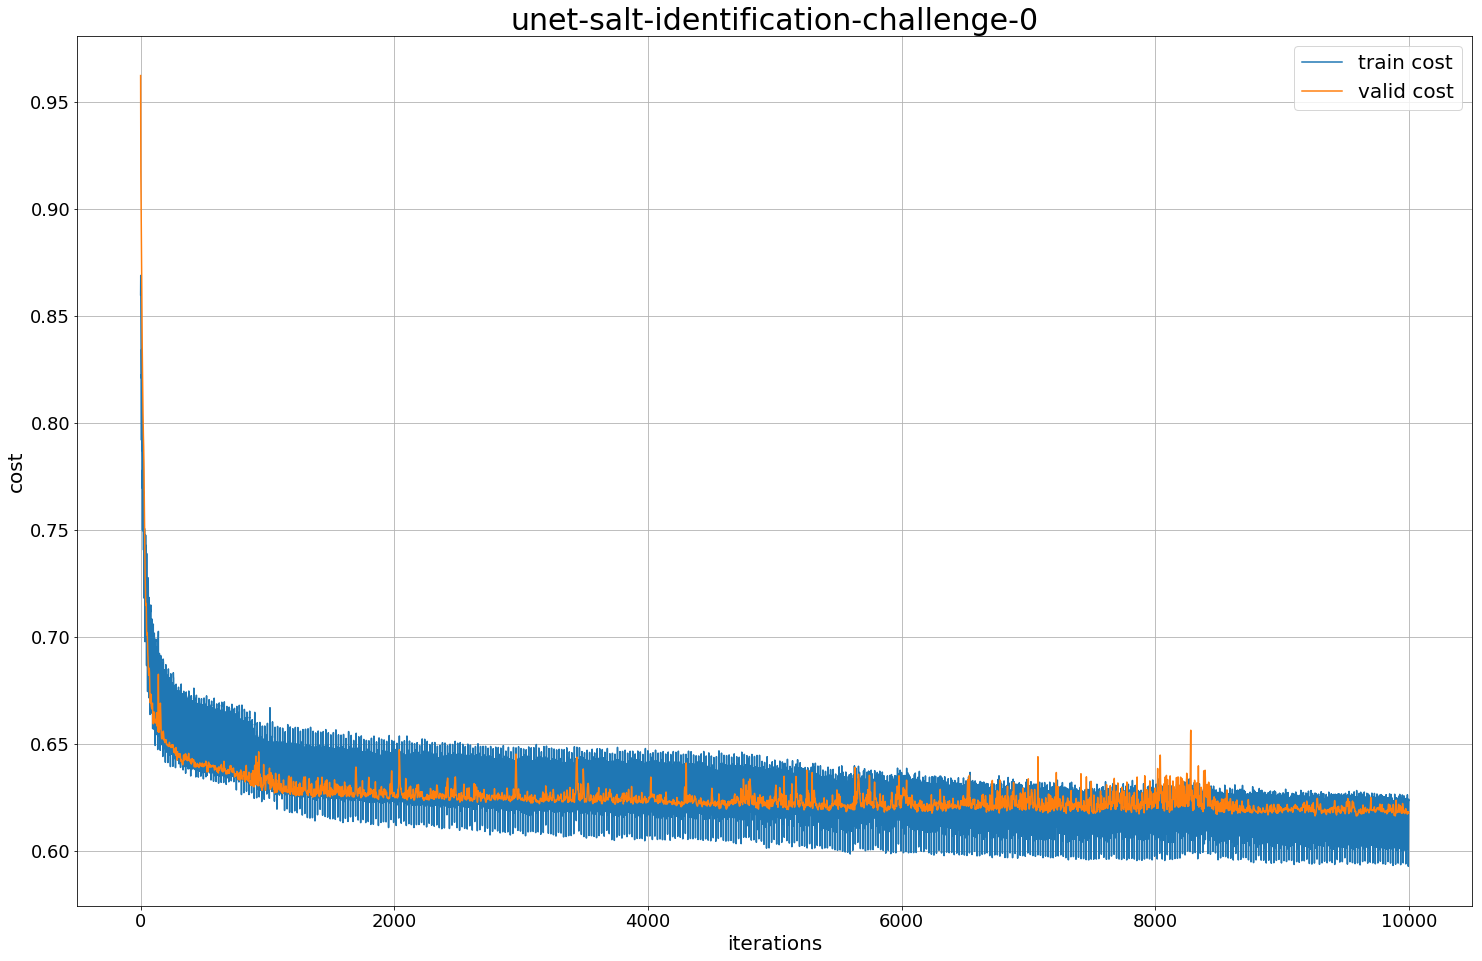

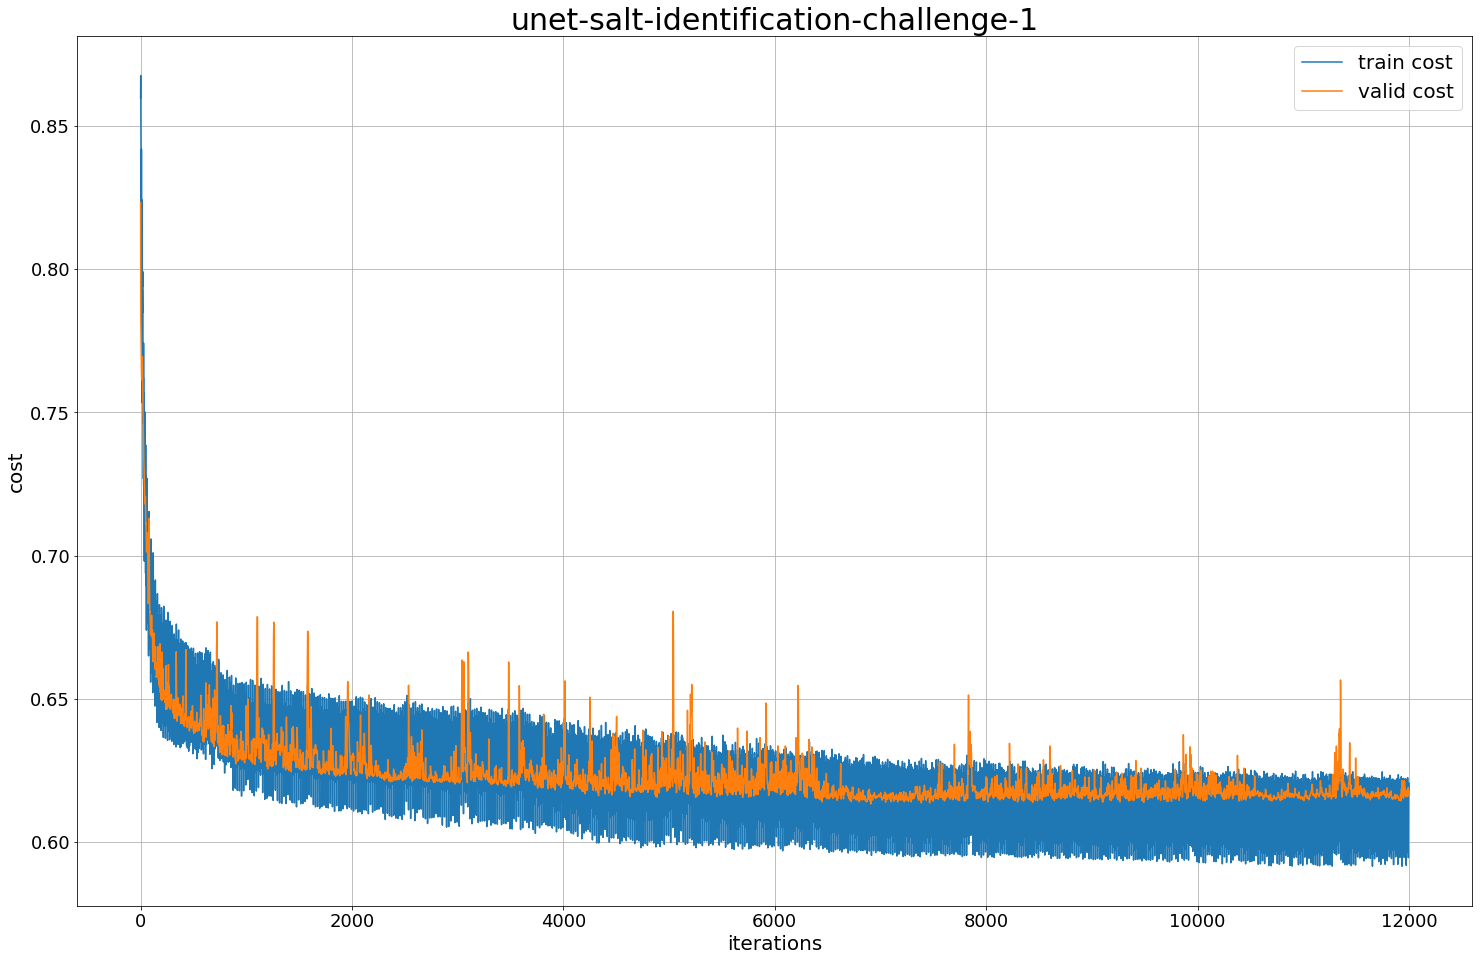

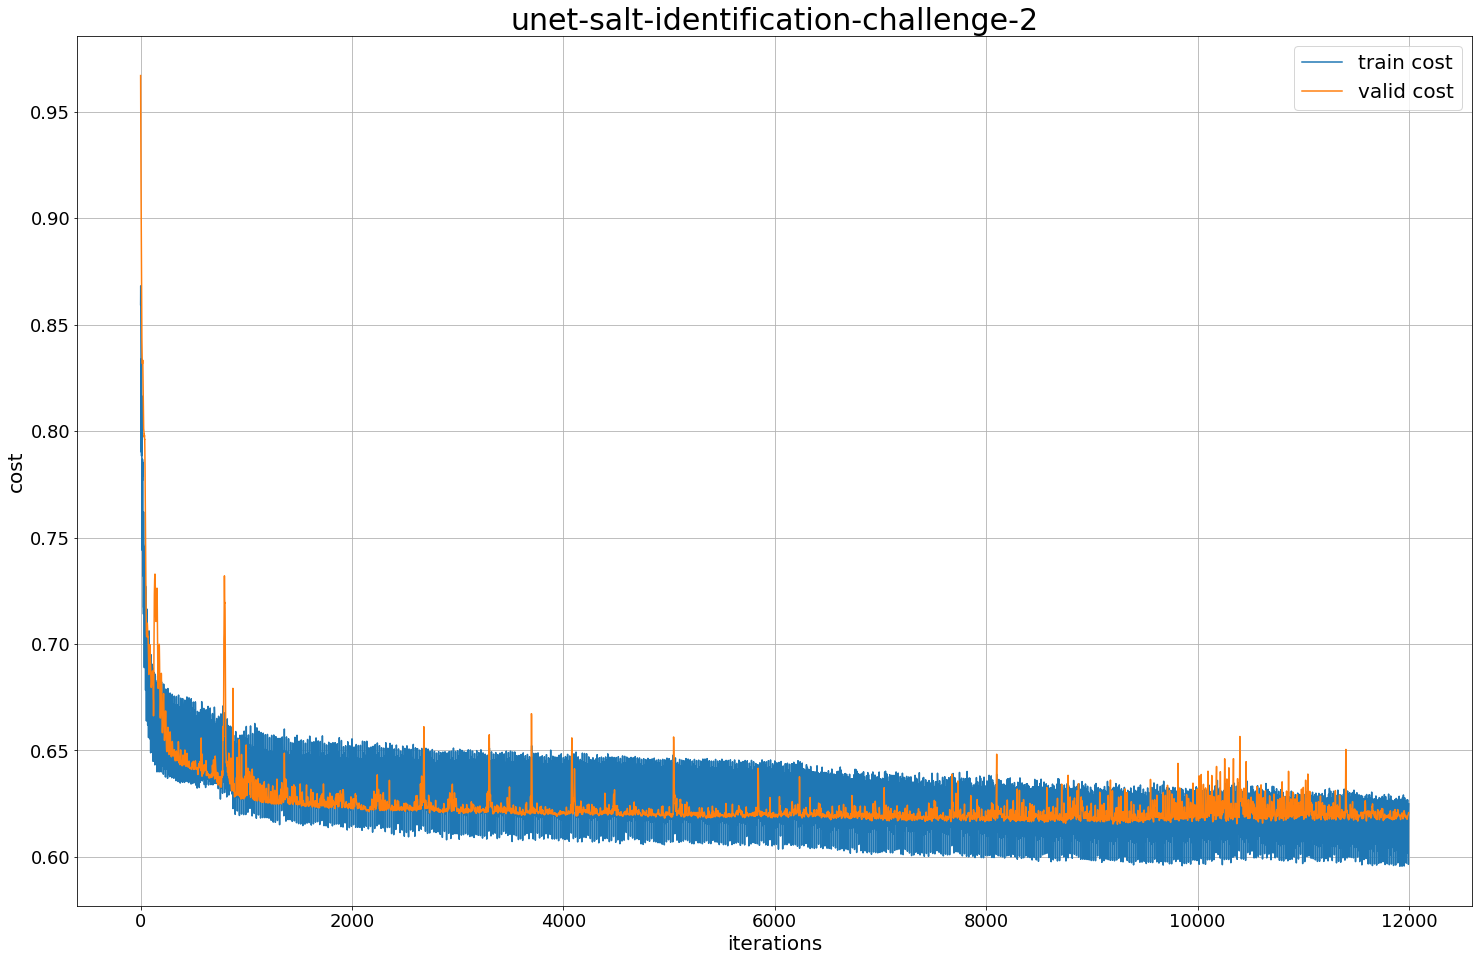

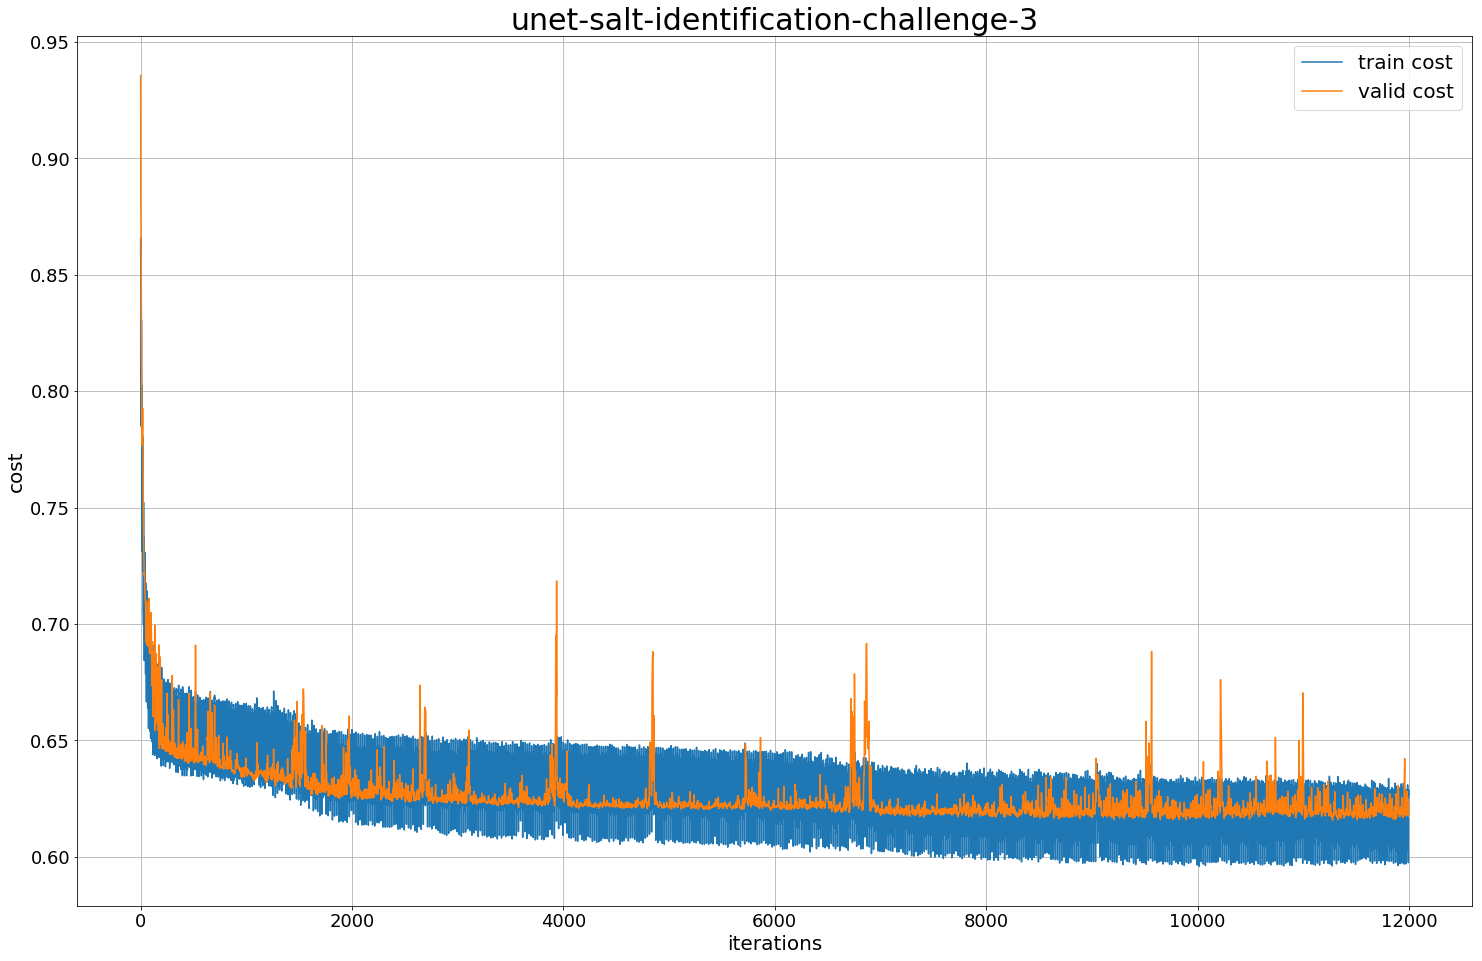

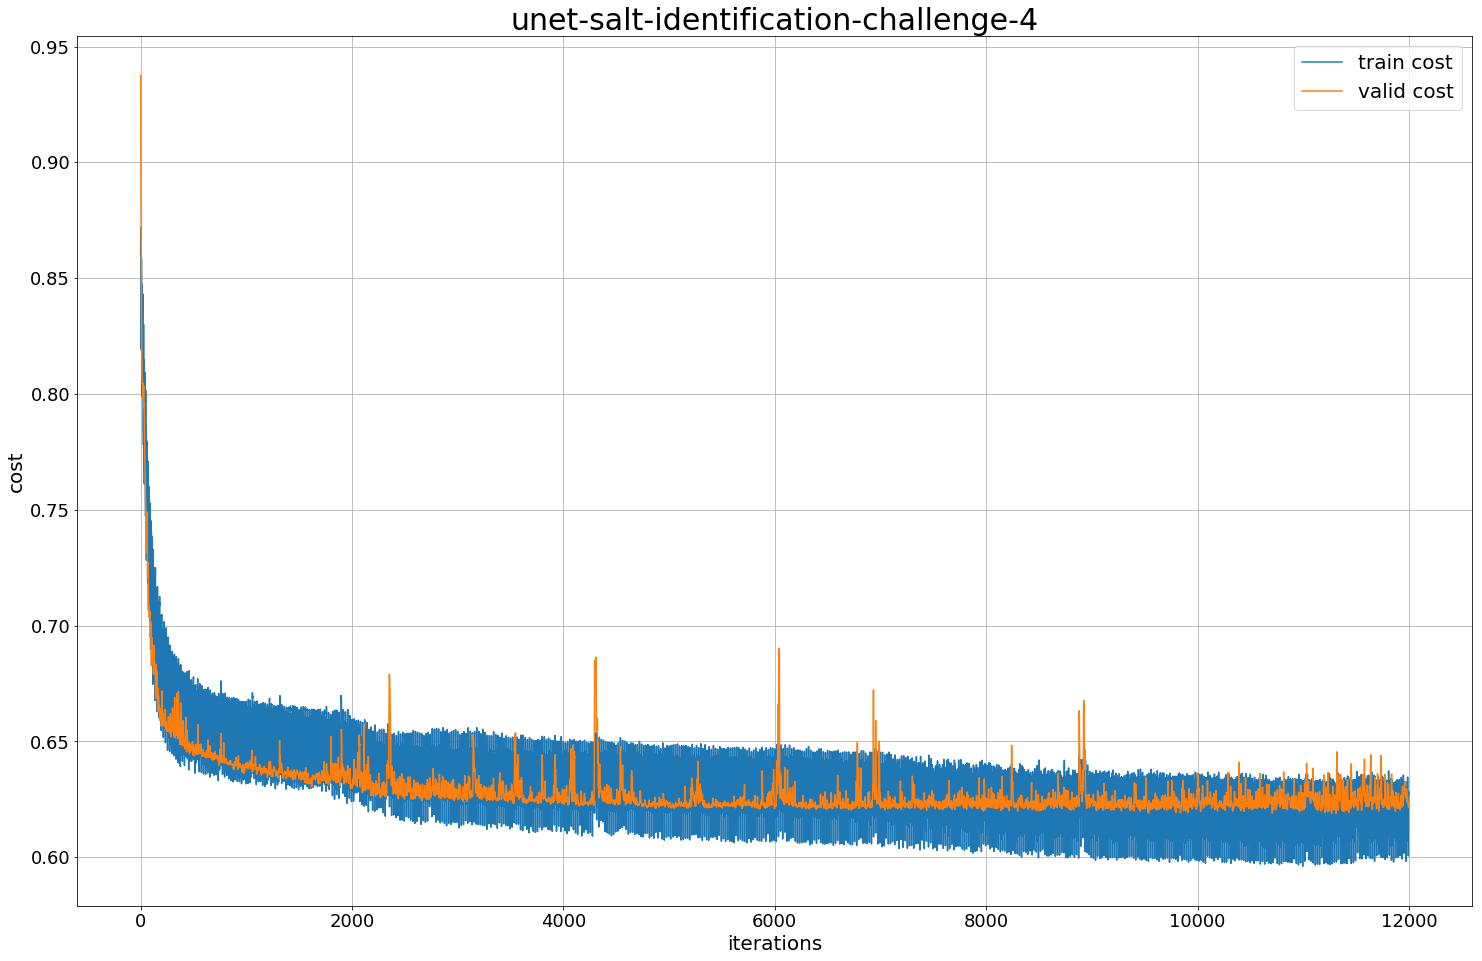

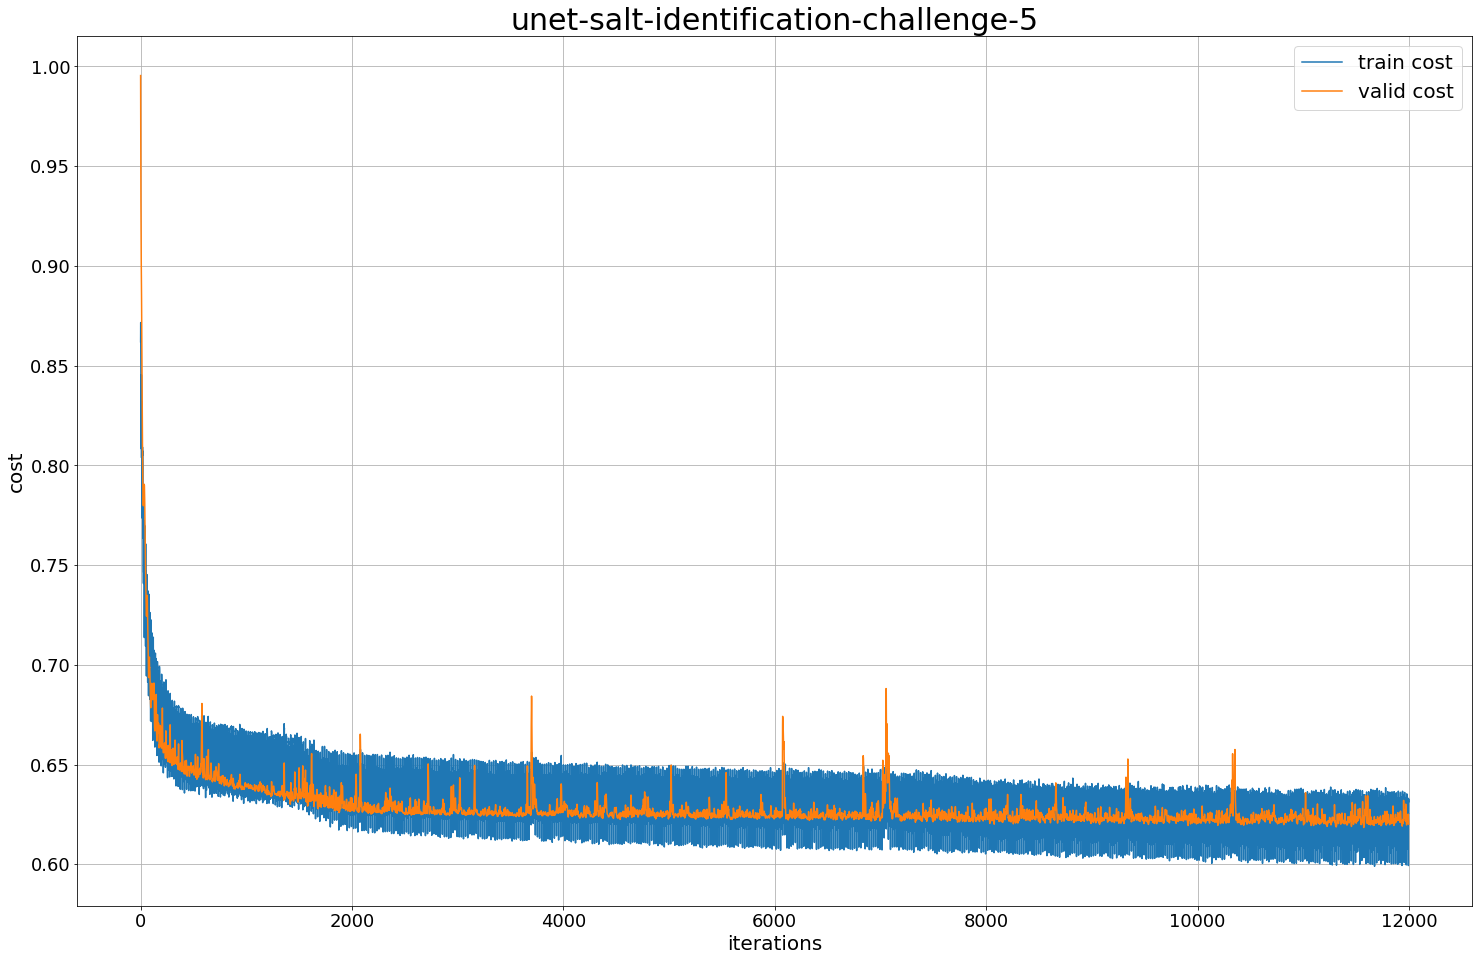

In [5]:
matplotlib.rcParams['figure.figsize'] = (25.0, 16.0)
# idexes of the models
indexes = [0,1,2,3,4,5]
# model prefix
model_prefix = "unet-salt_identification_challenge"
# results directory
results_dir = "./results/"
# iterate through each model
for index in indexes:
    # extract the filename of json containing hyperparameters
    filename = get_model_path(model_prefix, index, results_dir)
    # plot of cost vs iterations
    with open(filename, 'r') as fp:
        data = json.load(fp)
        plt.plot(ast.literal_eval(data["train_cost"]), label="train cost")
        plt.plot(ast.literal_eval(data["valid_cost"]), label="valid cost")
        plt.xlabel('iterations', fontsize=20)
        plt.ylabel('cost', fontsize=20)
        plt.title("unet-salt-identification-challenge-"+str(data["id"]), fontsize = 30)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.legend(fontsize=20)
        plt.grid()
        plt.show()

#### 2.1.2 Improved Unet

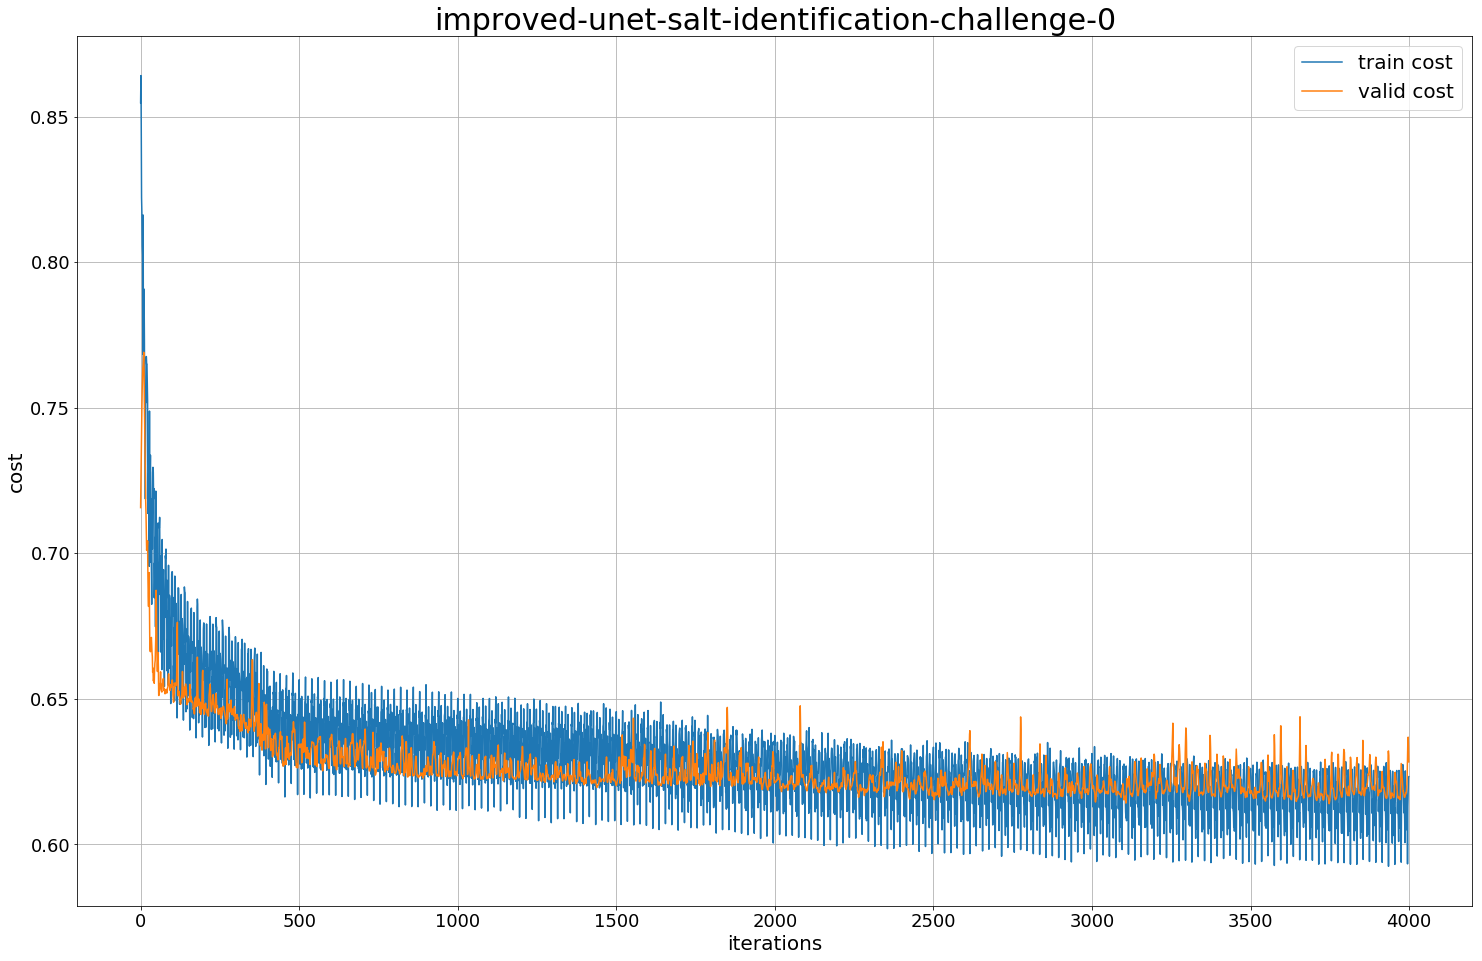

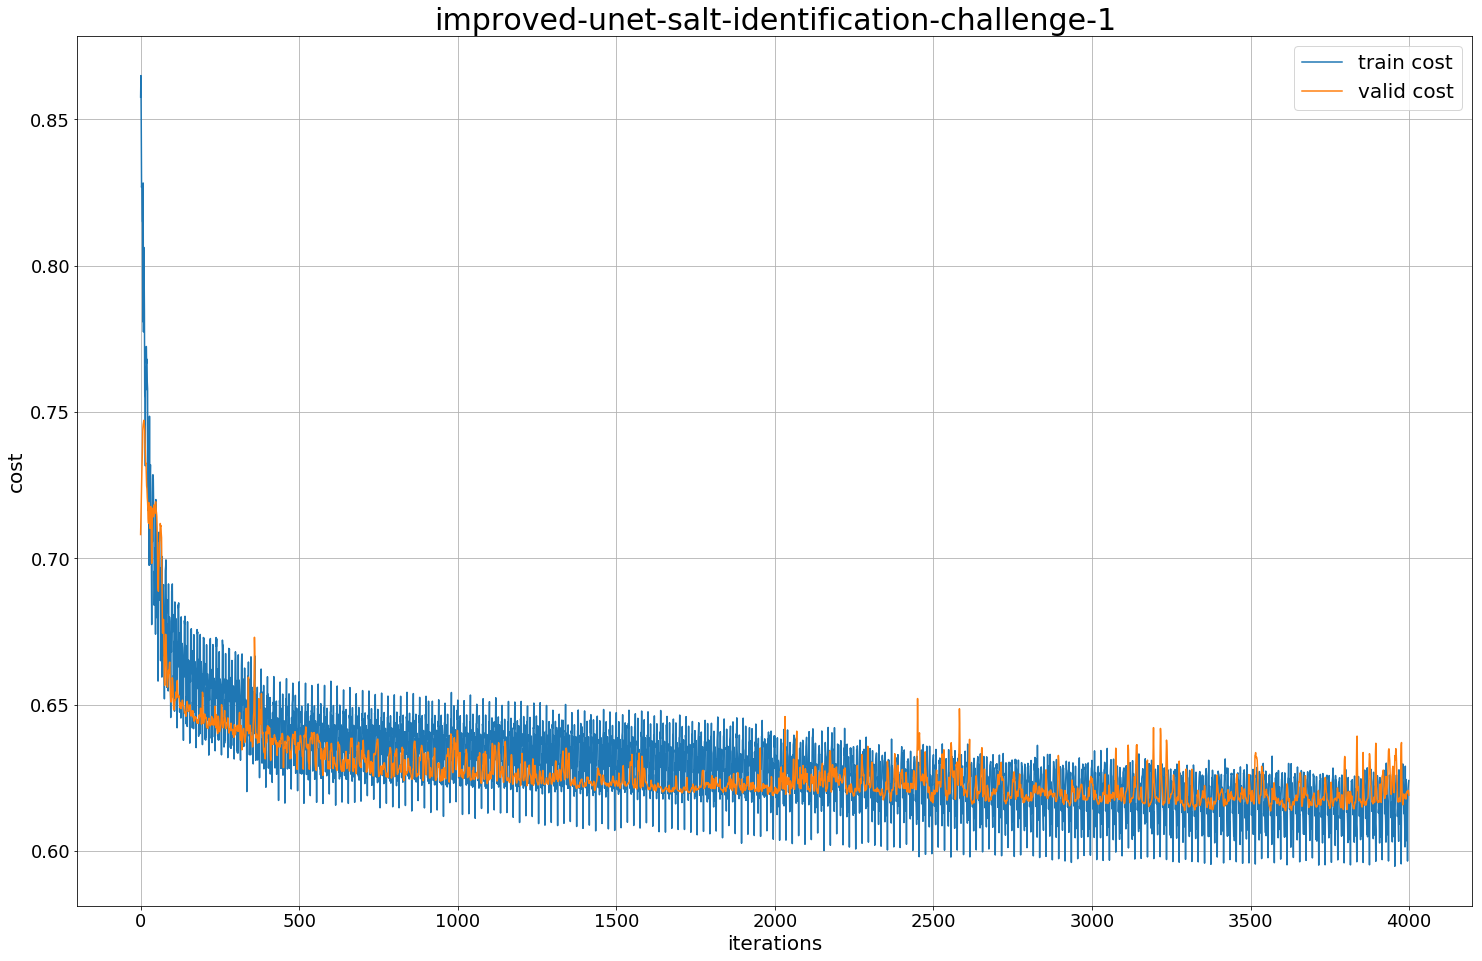

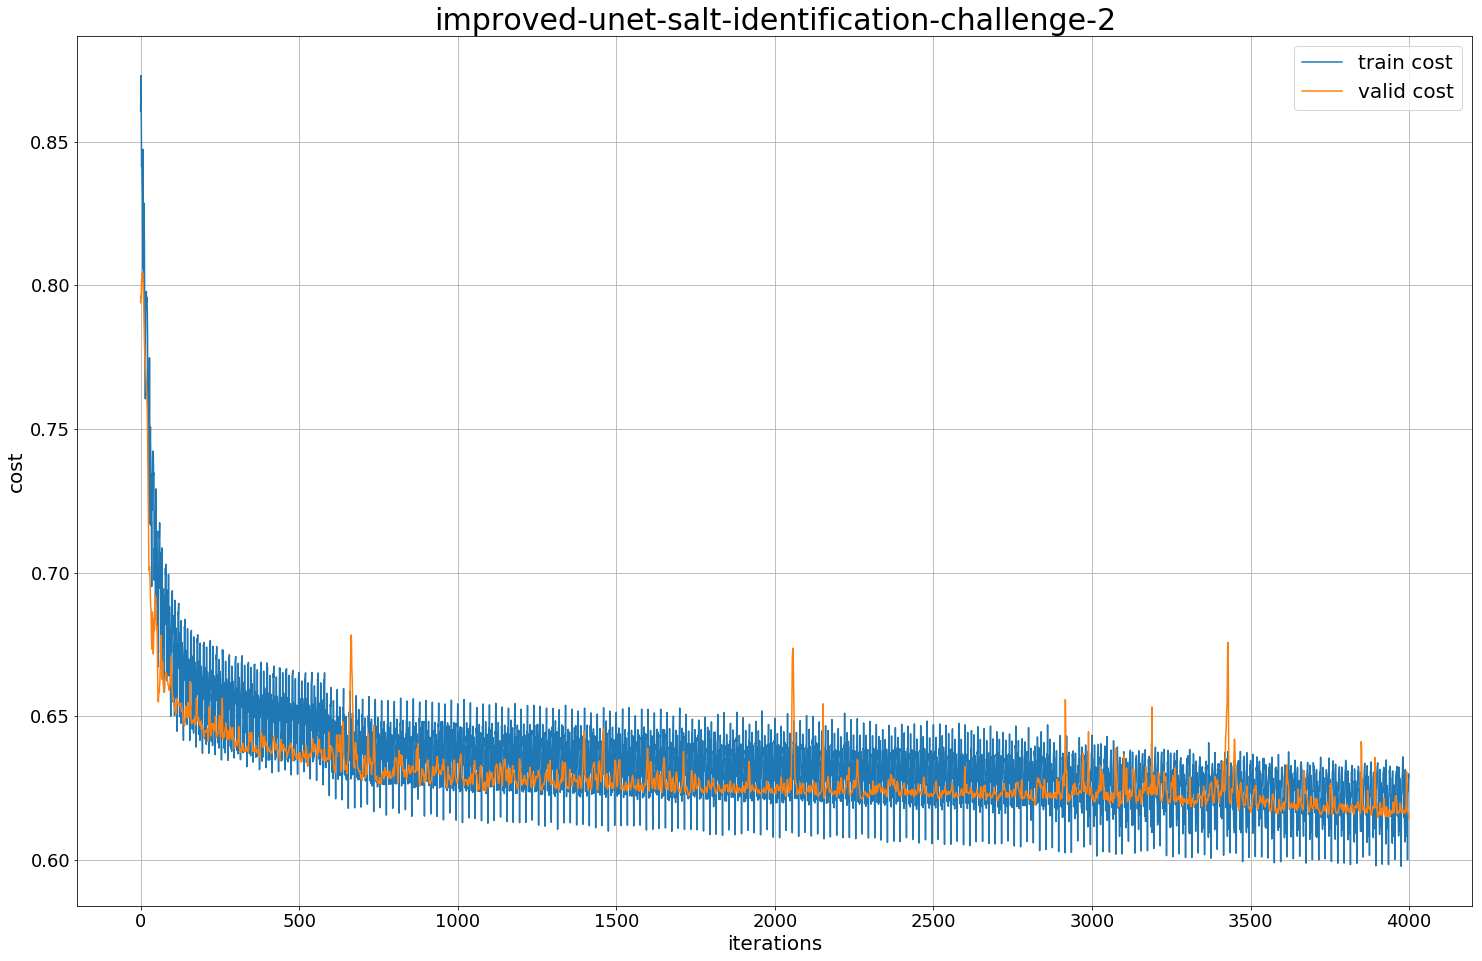

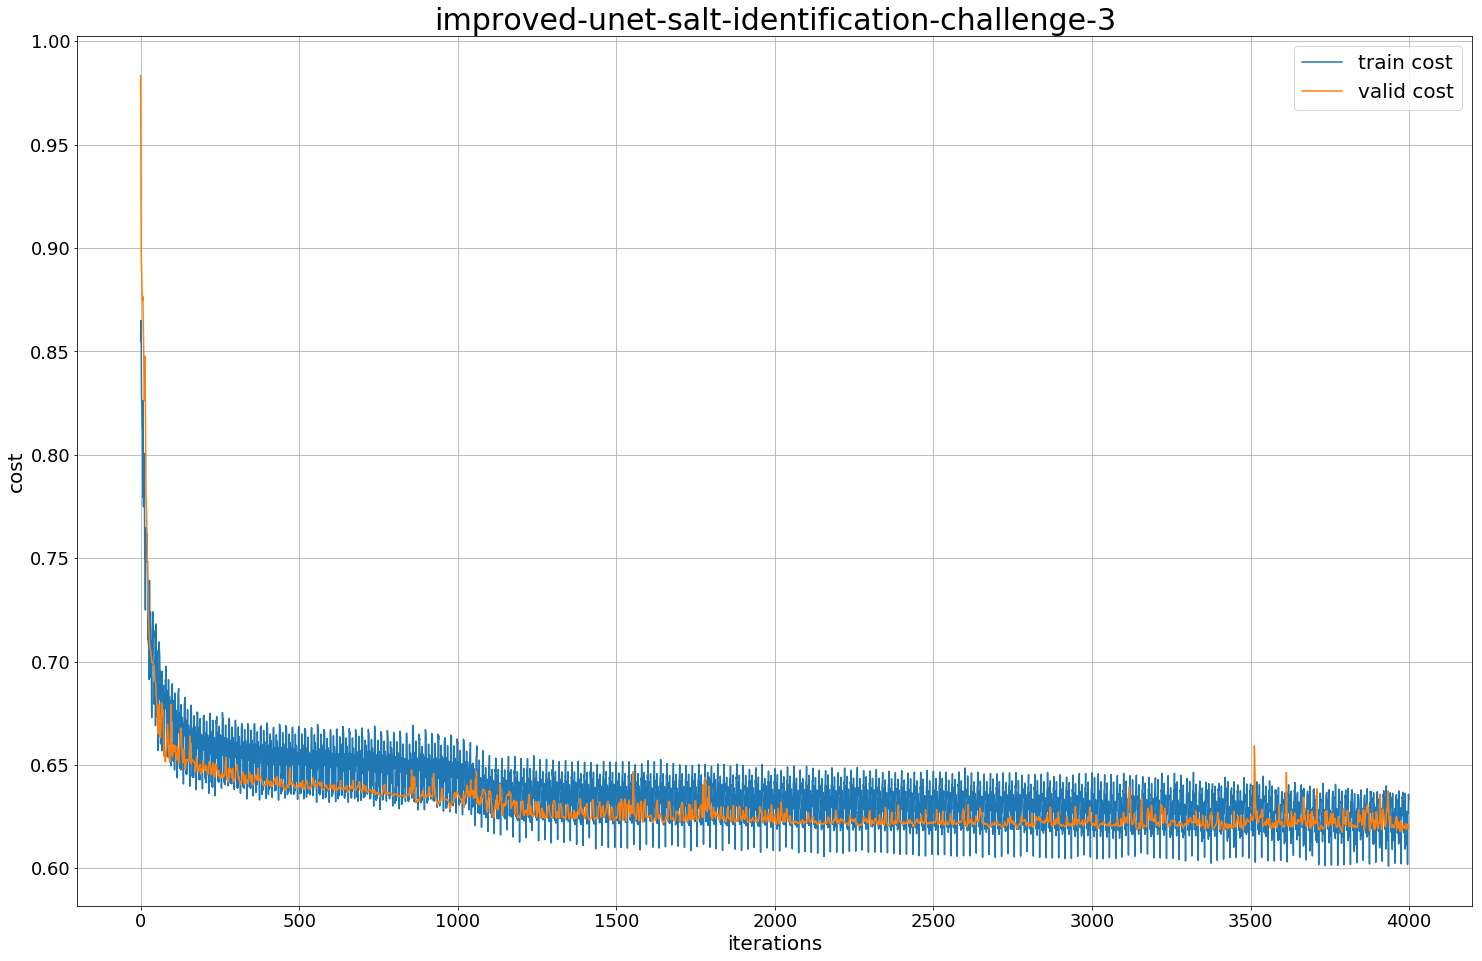

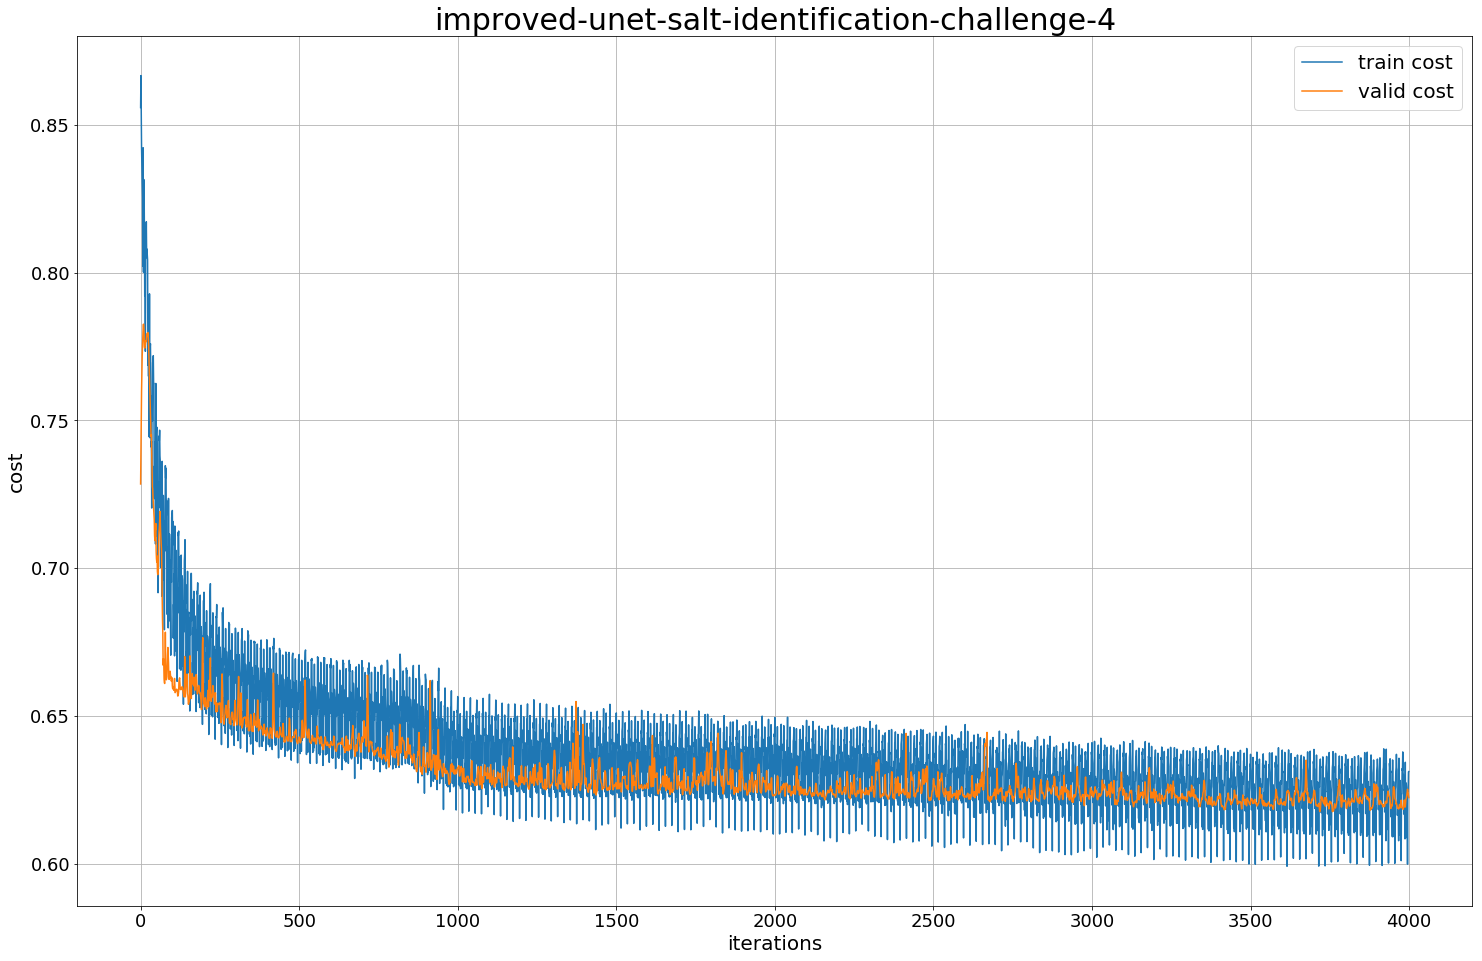

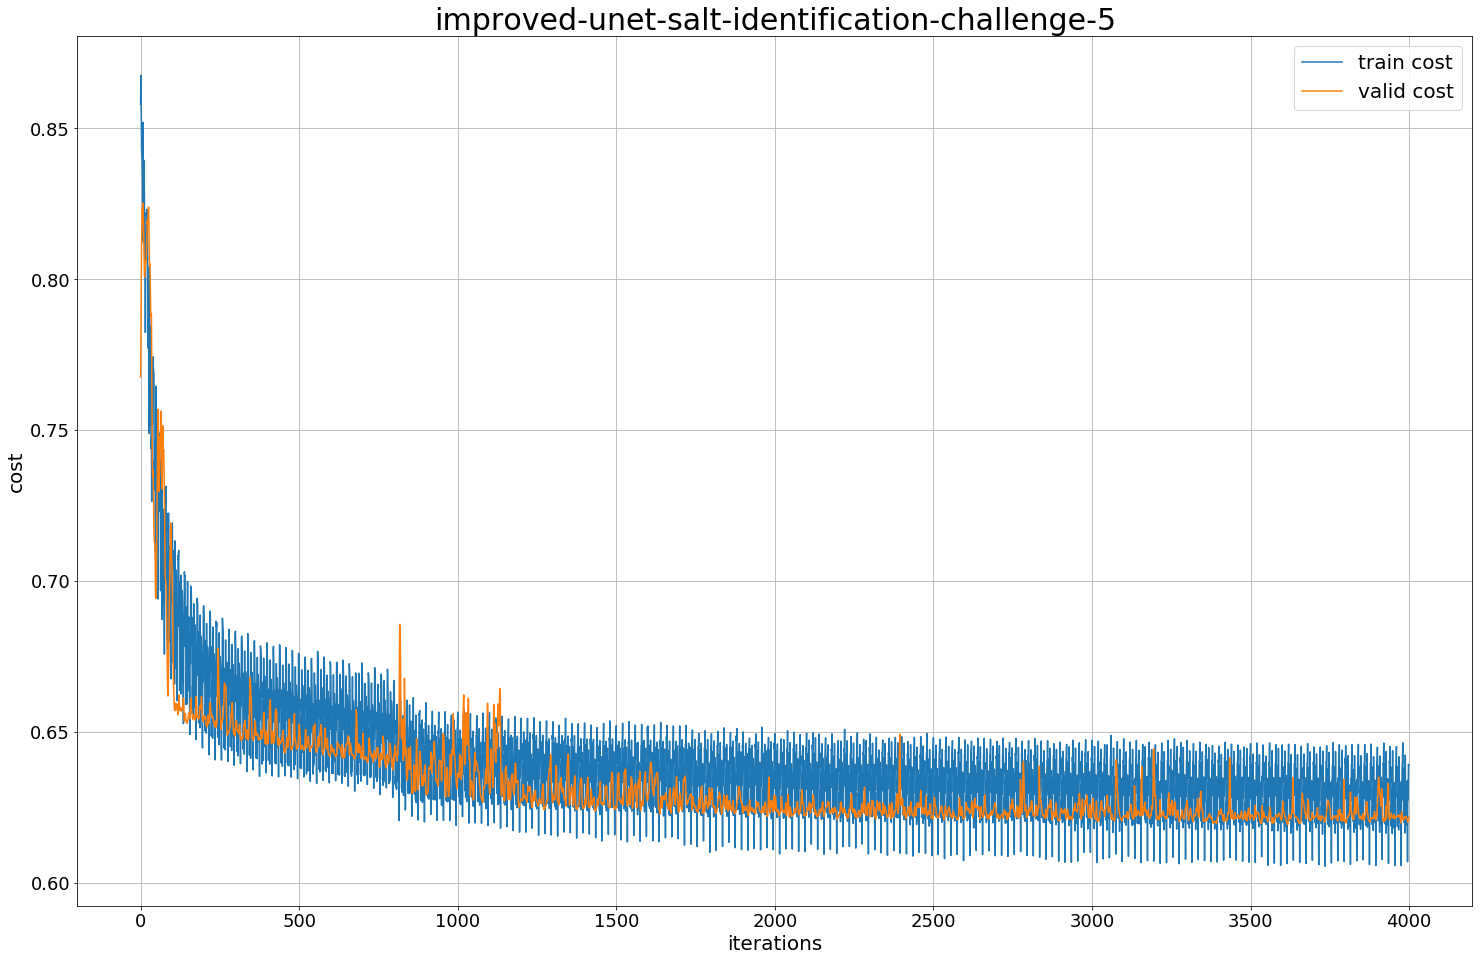

In [6]:
matplotlib.rcParams['figure.figsize'] = (25.0, 16.0)
# idexes of the models
indexes = [0,1,2,3,4,5]
# model prefix
model_prefix = "improved-unet-salt_identification_challenge"
# results directory
results_dir = "./results/"
# iterate through each model
for index in indexes:
    # extract the filename of json containing hyperparameters
    filename = get_model_path(model_prefix, index, results_dir)
    # plot of cost vs iterations
    with open(filename, 'r') as fp:
        data = json.load(fp)
        plt.plot(ast.literal_eval(data["train_cost"]), label="train cost")
        plt.plot(ast.literal_eval(data["valid_cost"]), label="valid cost")
        plt.xlabel('iterations', fontsize=20)
        plt.ylabel('cost', fontsize=20)
        plt.title("improved-unet-salt-identification-challenge-"+str(data["id"]), fontsize = 30)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.legend(fontsize=20)
        plt.grid()
        plt.show()